In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
def plot_compare(loaded_list,Budget,batch_size=1,n0=0,lbub=None,indexuse=8,stdstart=-8,
                 usestd=True,xlabel="Budget",ylabel="Accuracy",title="",
                legend_loc="lower right",plot_best=True,need_pvalue=True):
    accall=0
    accall2=0
    x=torch.arange(0, Budget+1, 1)
    ll=torch.arange(0,Budget+1,batch_size)
    accall = torch.empty(0,len(loaded_list[0])-2,len(x))
    bestacc = torch.empty(0)
    bestacc_test = torch.empty(0)
    
    for loop in range(len(loaded_list)):
        bestacc = torch.cat((bestacc,loaded_list[0][13][0].view(-1)))
        bestacc_test = torch.cat((bestacc_test,loaded_list[0][14][0].view(-1)))
        accallone = torch.zeros(len(loaded_list[0])-2,len(x))
        for ind in np.arange(len(loaded_list[0])-2):
            acc=loaded_list[loop][ind][:,indexuse]
            bud=loaded_list[loop][ind][:,5]
            accnew=torch.tensor([acc[0]])
            for i in range(len(x)-1):
                locnow=torch.where((bud>x[i]) & (bud<=x[i+1]))[0]
                accnew=torch.cat((accnew,torch.mean(acc[locnow]).view(-1)))
            accnew=accnew.reshape(1,len(x))
            accallone[ind] = accnew
        accall = torch.cat((accall,accallone.unsqueeze(0)),0)
    yall = accall.mean(dim=0)
    stdall = accall.std(dim=0)
    def getplot(x,y,ll,label,color,linestyle,linewidth=3,std=None):
        plt.plot(x[ll]+n0,y[ll], label=label, color=color, linestyle=linestyle,linewidth=linewidth)
        if (std is not None) and (usestd):
            co=1.96/(len(loaded_list)-1)**0.5
            for locnow in ll[stdstart:]:
                plt.plot([x[locnow]+n0,x[locnow]+n0],[y[locnow]-co*std[locnow],y[locnow]+co*std[locnow]],
                         color=color, linestyle="-",linewidth=linewidth/1.2)
    colors = ['#377eb8','#e41a1c',  '#4daf4a', '#984ea3',
    '#ff7f00', '#ffff33', '#a65628', '#000000']
    colors = ['#377eb8','#e41a1c',  '#4daf4a', '#984ea3',
    '#ffff33', '#a65628', '#000000']
    linestyles = ['-', '--', '-.', ':', (0, (5, 2)), (0, (1, 1)), (0, (3, 5, 1, 5)), (0, (2, 2, 10, 2))]
    getplot(x, yall[0],ll, label='ALMQ', color=colors[0], linestyle=linestyles[0],linewidth=3,std=stdall[0])
    getplot(x, yall[3],ll, label='BALD', color=colors[1], linestyle=linestyles[1],linewidth=3,std=stdall[3])
    getplot(x, yall[5],ll, label='EN', color=colors[2], linestyle=linestyles[2],linewidth=3,std=stdall[5])
    getplot(x, yall[7],ll, label='VAR', color=colors[3], linestyle=linestyles[3],linewidth=3,std=stdall[7])
    getplot(x, yall[9],ll, label='LC', color=colors[4], linestyle=linestyles[4],linewidth=3,std=stdall[9])
    getplot(x, yall[11],ll, label='RA', color=colors[5], linestyle=linestyles[5],linewidth=3,std=stdall[11])
    getplot(x, yall[2],ll, label='BADGE', color=colors[6], linestyle=linestyles[6],linewidth=3,std=stdall[2])

    if plot_best and indexuse==8:
        plt.hlines(y= bestacc_test.mean(),xmin=x.min()+n0,xmax=x.max()+n0, colors='#f781bf',
                   linewidth=3,label="Full", linestyle='-')
    if plot_best and indexuse==0:
        plt.hlines(y= bestacc.mean(), xmin=x.min()+n0,xmax=x.max()+n0,colors='#f781bf',
                   linewidth=3,label="Full", linestyle='-')
    if lbub is not None:
        plt.ylim(lbub[0],lbub[1]) 
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=20)
    plt.grid(True)
    #plt.xticks(x[ll]+n0)
    
def compare_ee_minus(loaded_list,Budget,batch_size=1,n0=0,lbub=None,indexuse=8,stdstart=-8,
                 usestd=True,xlabel="Budget",ylabel="Accuracy",title="",
                legend_loc="lower right",plot_best=True,need_pvalue=True):
    accall=0
    accall2=0
    x=torch.arange(0, Budget+1, 1)
    ll=torch.arange(0,Budget+1,batch_size)
    accall = torch.empty(0,len(loaded_list[0])-2,len(x))
    bestacc = torch.empty(0)
    bestacc_test = torch.empty(0)
    
    for loop in range(len(loaded_list)):
        bestacc = torch.cat((bestacc,loaded_list[0][13][0].view(-1)))
        bestacc_test = torch.cat((bestacc_test,loaded_list[0][14][0].view(-1)))
        accallone = torch.zeros(len(loaded_list[0])-2,len(x))
        for ind in np.arange(len(loaded_list[0])-2):
            acc=loaded_list[loop][ind][:,indexuse]
            bud=loaded_list[loop][ind][:,5]
            accnew=torch.tensor([acc[0]])
            for i in range(len(x)-1):
                locnow=torch.where((bud>x[i]) & (bud<=x[i+1]))[0]
                accnew=torch.cat((accnew,torch.mean(acc[locnow]).view(-1)))
            accnew=accnew.reshape(1,len(x))
            accallone[ind] = accnew
        accall = torch.cat((accall,accallone.unsqueeze(0)),0)
    yall = accall.mean(dim=0)
    stdall = accall.std(dim=0)
    def getplot(x,y,ll,label,color,linestyle,linewidth=3):
        plt.plot(x[ll]+n0,y[ll], label=label, color=color, linestyle=linestyle,linewidth=linewidth)
    colors = ['#377eb8','#e41a1c',  '#4daf4a', '#984ea3',
    '#ff7f00', '#ffff33', '#a65628', '#000000']
    colors = ['#377eb8','#e41a1c',  '#4daf4a', '#984ea3',
     '#ffff33', '#a65628', '#000000']
    linestyles = ['-', '--', '-.', ':', (0, (5, 2)), (0, (1, 1)), (0, (3, 5, 1, 5)), (0, (2, 2, 10, 2))]
    getplot(x, yall[0]-yall[1],ll, label='ALMQ', color=colors[0], linestyle=linestyles[0],linewidth=3)
    getplot(x, yall[3]-yall[4],ll, label='BALD', color=colors[1], linestyle=linestyles[1],linewidth=3)
    getplot(x, yall[5]-yall[6],ll, label='EN', color=colors[2], linestyle=linestyles[2],linewidth=3)
    getplot(x, yall[7]-yall[8],ll, label='VAR', color=colors[3], linestyle=linestyles[3],linewidth=3)
    getplot(x, yall[9]-yall[10],ll, label='LC', color=colors[4], linestyle=linestyles[4],linewidth=3)
    getplot(x, yall[11]-yall[12],ll, label='RA', color=colors[5], linestyle=linestyles[5],linewidth=3)
    if lbub is not None:
        plt.ylim(lbub[0],lbub[1]) 
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=20)
    plt.grid(True)



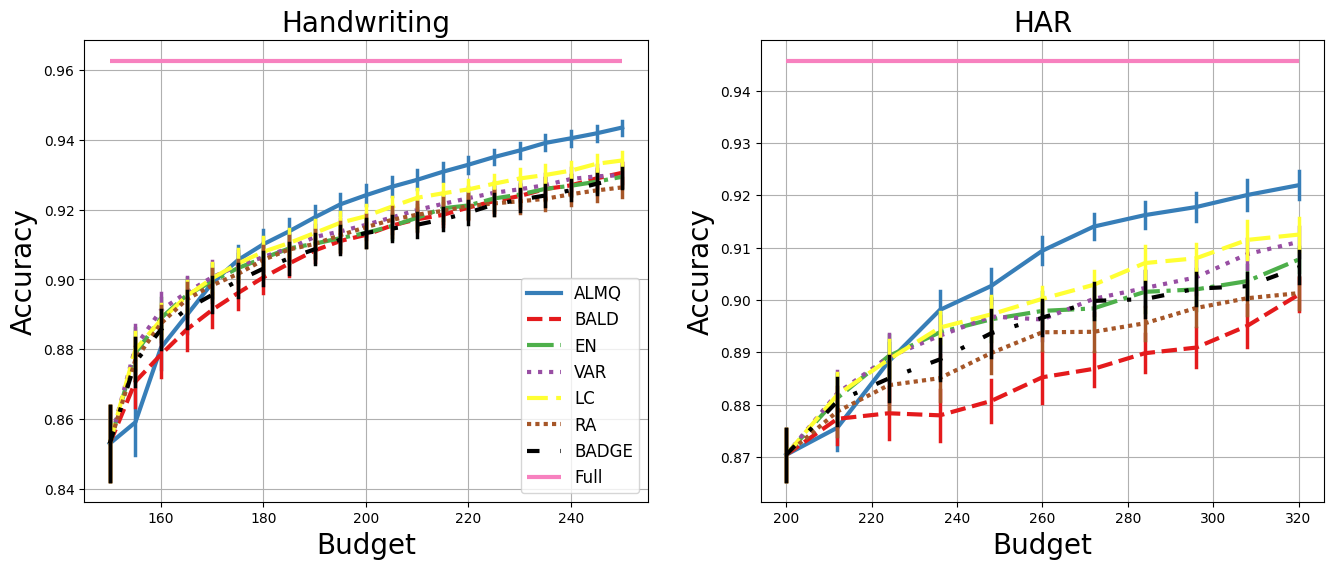

In [2]:
plt.figure(figsize=(16,6))
filename="Handwriting_result"
loaded_list=[]
numbersall=[0]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,1)
plot_compare(loaded_list=loaded_list,Budget=100,batch_size=5,n0=150,lbub=None,
             indexuse=8,stdstart=0,usestd=True,xlabel="Budget",ylabel="Accuracy",title="Handwriting",
             plot_best=True,need_pvalue=True)
plt.legend(fontsize=12,loc="lower right")
filename="HAR_result"
loaded_list=[]
numbersall=[0]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,2)
plot_compare(loaded_list=loaded_list,Budget=120,batch_size=12,n0=200,lbub=None,
             indexuse=8,stdstart=0,usestd=True,xlabel="Budget",ylabel="Accuracy",title="HAR",
             plot_best=True,need_pvalue=True)
plt.show()

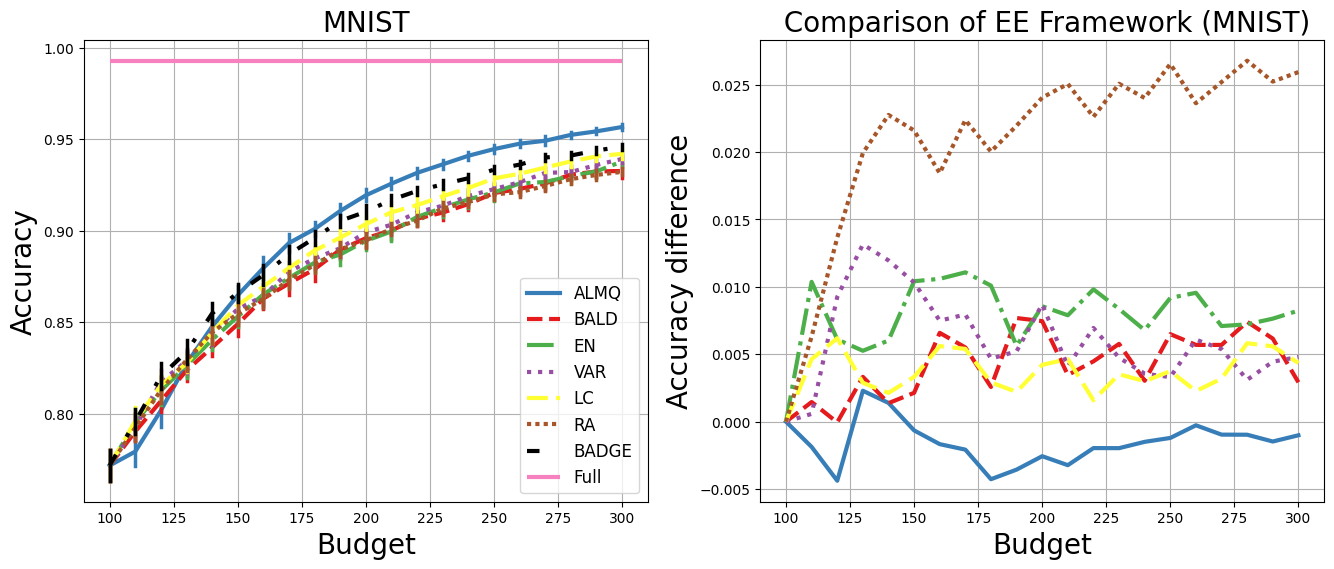

In [3]:
plt.figure(figsize=(16,6))
filename="MNIST_result"
loaded_list=[]
numbersall=[0,1,2,3,4]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,1)
plot_compare(loaded_list=loaded_list,Budget=200,batch_size=10,n0=100,lbub=None,
             indexuse=8,stdstart=0,usestd=True,xlabel="Budget",
             ylabel="Accuracy",title="MNIST",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.legend(fontsize=12,loc="lower right")
plt.subplot(1,2,2)
compare_ee_minus(loaded_list=loaded_list,Budget=200,batch_size=10,n0=100,lbub=None,
             indexuse=8,stdstart=0,usestd=False,xlabel="Budget",
             ylabel="Accuracy difference",title=" Comparison of EE Framework (MNIST)",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.show()

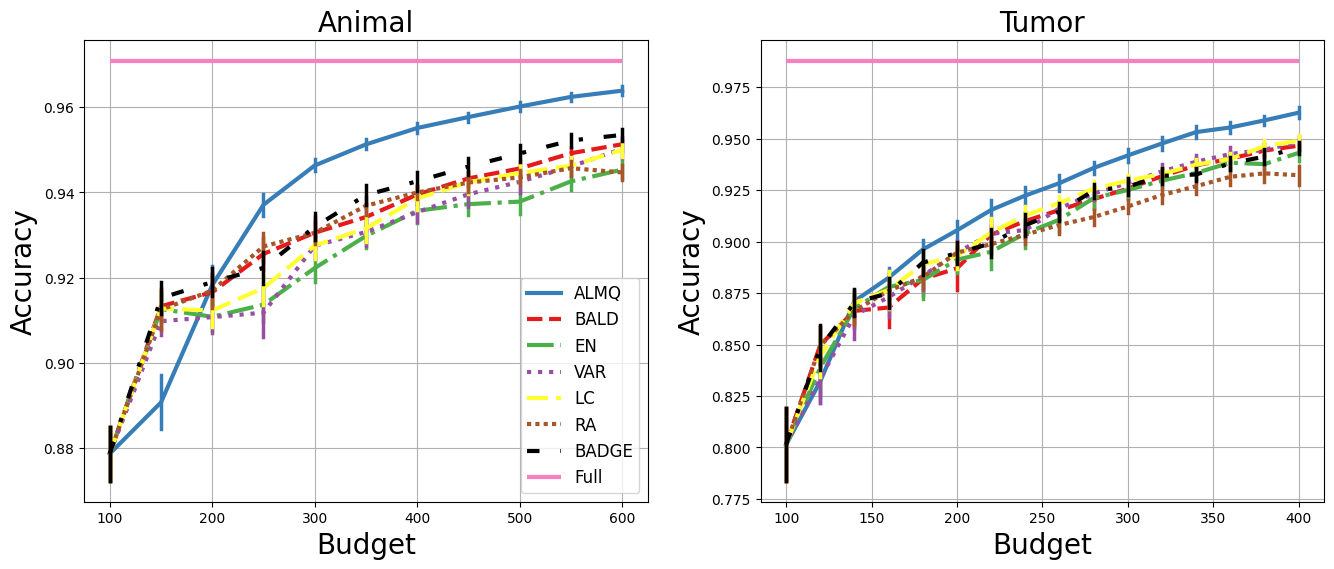

In [4]:
filename="Animal_result"
loaded_list=[]
numbersall=[0,1,2,3,4]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_compare(loaded_list=loaded_list,Budget=500,batch_size=50,n0=100,lbub=None,
             indexuse=8,stdstart=0,usestd=True,xlabel="Budget",
             ylabel="Accuracy",title="Animal",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.legend(fontsize=12,loc="lower right")
filename="Tumor_result"
loaded_list=[]
numbersall=[0,1,2,3,4]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,2)
plot_compare(loaded_list=loaded_list,Budget=300,batch_size=20,n0=100,lbub=None,
             indexuse=8,stdstart=0,usestd=True,xlabel="Budget",
             ylabel="Accuracy",title="Tumor",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.show()

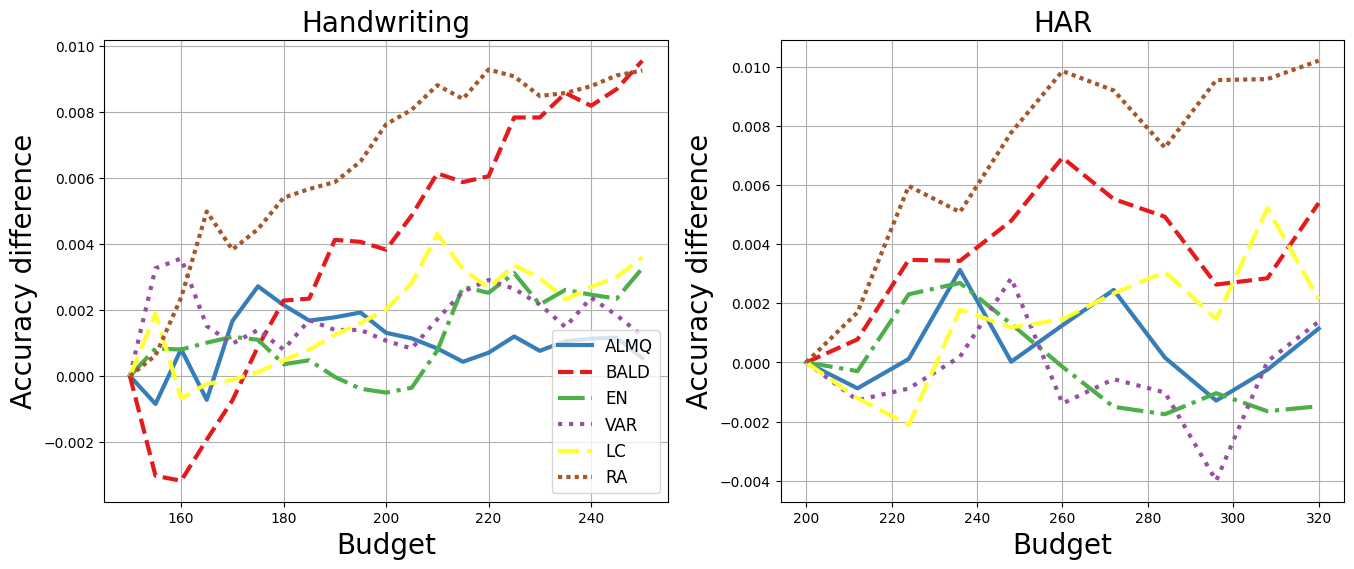

In [5]:
plt.figure(figsize=(16,6))
filename="Handwriting_result"
loaded_list=[]
numbersall=[0]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,1)
compare_ee_minus(loaded_list=loaded_list,Budget=100,batch_size=5,n0=150,lbub=None,
             indexuse=8,stdstart=0,usestd=False,xlabel="Budget",
             ylabel="Accuracy difference",title="Handwriting",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.legend(fontsize=12,loc="lower right")
filename="HAR_result"
loaded_list=[]
numbersall=[0]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,2)
compare_ee_minus(loaded_list=loaded_list,Budget=120,batch_size=12,n0=200,lbub=None,
             indexuse=8,stdstart=0,usestd=False,xlabel="Budget",
             ylabel="Accuracy difference",title="HAR",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.show()



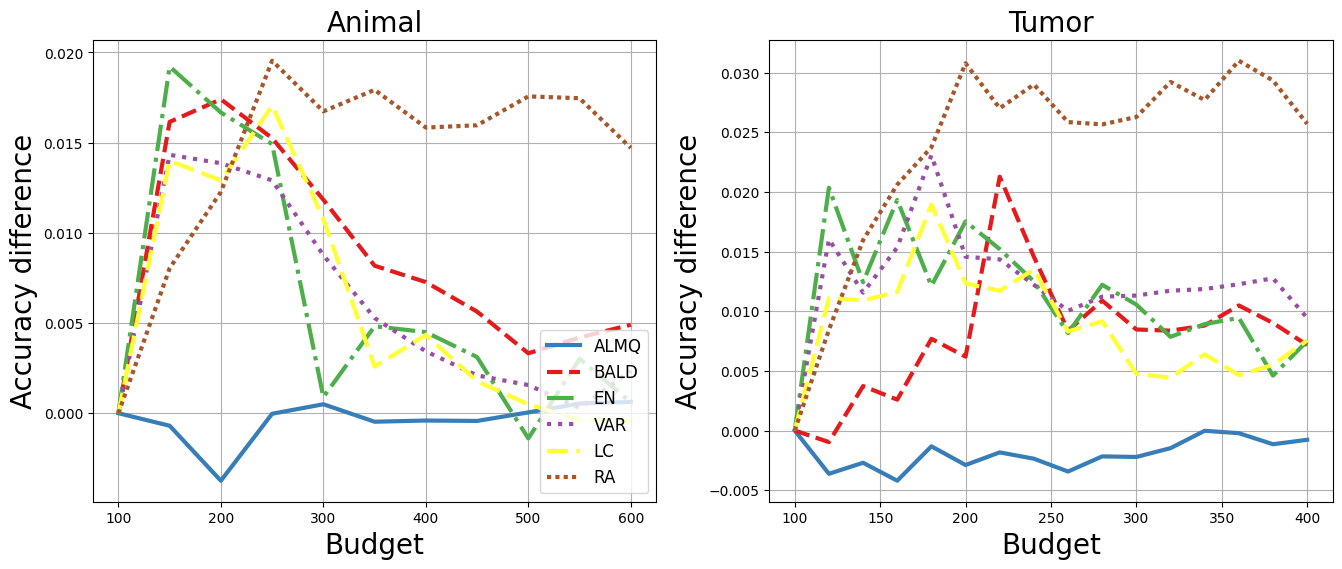

In [6]:
filename="Animal_result"
loaded_list=[]
numbersall=[0,1,2,3,4]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
compare_ee_minus(loaded_list=loaded_list,Budget=500,batch_size=50,n0=100,lbub=None,
             indexuse=8,stdstart=0,usestd=False,xlabel="Budget",
             ylabel="Accuracy difference",title="Animal",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.legend(fontsize=12,loc="lower right")
filename="Tumor_result"
loaded_list=[]
numbersall=[0,1,2,3,4]
for i in numbersall:
    with open(filename+'/result'+str(i)+'.pkl', 'rb') as f:
        loaded_list =loaded_list+ pickle.load(f)
plt.subplot(1,2,2)
compare_ee_minus(loaded_list=loaded_list,Budget=300,batch_size=20,n0=100,lbub=None,
             indexuse=8,stdstart=0,usestd=False,xlabel="Budget",
             ylabel="Accuracy difference",title="Tumor",legend_loc="lower right",
             plot_best=True,need_pvalue=True)
plt.show()